# Итоговое решение по проекту 4 - "Компьютер говорит "Нет!"
**Выполнила Наиля Хуснуллина**

In [1]:
import numpy as np 
import pandas as pd 
from pandas import Series

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sf-dst-scoring/train.csv
/kaggle/input/sf-dst-scoring/test.csv
/kaggle/input/sf-dst-scoring/sample_submission.csv


In [2]:
RANDOM_SEED = 42
!pip freeze > requirements.txt

path_to_data = '/kaggle/input/sf-dst-scoring/'

# Импорт и просмотр данных
df_train = pd.read_csv(path_to_data+'train.csv')
df_test = pd.read_csv(path_to_data+'test.csv')
#sample_submission = pd.read_csv(path_to_data+'/sample_submission.csv')

print('df_train: ', df_train.shape)
display(df_train.head())
print('df_test: ', df_test.shape)
display(df_test.head())

df_train:  (73799, 19)


,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


df_test:  (36349, 18)


,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [4]:
df_train.isnull().sum()

client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
dtype: int64

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

In [6]:
df_test.isnull().sum()

client_id             0
app_date              0
education           171
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
dtype: int64

In [7]:
# Объединяем данные для обработки

df_train['Train'] = 1 # помечаем трейн
df_test['Train'] = 0 # помечаем тест

df = df_train.append(df_test, sort=False).reset_index(drop=True)

In [8]:
df.shape

(110148, 20)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         109670 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

В тренировочной выборке 73799 клиентов.     
В тестовой выборке - 36349 клиентов.     
Всего 110148 клиентов.       
      
В исходных данных **19 признаков**:  
1 временной  ('app_date'),      
                                 6 бинарных   ('sex', 'car', 'car_type', 'good_work', 'foreign_passport', 'default'),       
                                 6 категориальных ('education', 'region_rating', 'home_address', 'work_address', 'sna', 'first_time')      
                                 6 числовых   ('client_id', 'age', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'income').    

Пропуски встречаются только в признаке 'education' - 478 (в train - 307 пропусков, в test - 171 пропуск).      

**client_id** - числовой идентификационный признак, можно удалить.      
**default** - целевая переменная, есть только в данных train.

> Описание признаков

1. client_id - идентификатор клиента
2. app_date - дата подачи заявки 
3. education - уровень образования 
4. sex - пол заемщика 
5. age - возраст заемщика 
6. car - флаг наличия автомобиля
7. car_type - флаг автомобиля иномарки 
8. decline_app_cnt - количество отказанных прошлых заявок 
9. good_work - флаг наличия “хорошей” работы 
10. score_bki - скоринговый балл по данным из БКИ
11. bki_request_cnt - количество запросов в БКИ
12. region_rating - рейтинг региона
13. home_address - категоризатор домашнего адреса
14. work_address - категоризатор рабочего адреса
15. income - доход заемщика
16. sna - связь заемщика с клиентами банка
17. first_time - давность наличия информации о заемщике
18. foreign_passport - наличие загранпаспорта
19. default - флаг дефолта по кредиту

# Анализ признаков

### Временной признак 'app_date'

In [10]:
from datetime import datetime
current_date = pd.to_datetime('21/10/2020')

In [11]:
df.app_date = pd.to_datetime(df.app_date, format='%d%b%Y')

In [12]:
# Признак последовательности дней 
df['days'] = (df.app_date - df.app_date.min()).dt.days.astype('int')

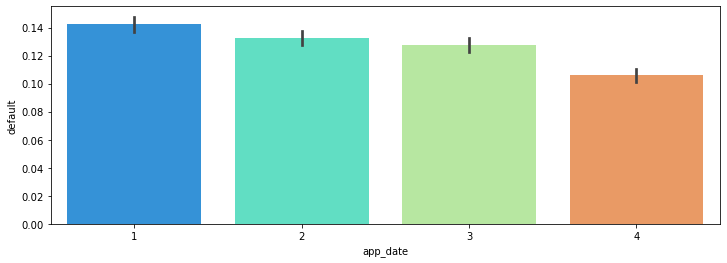

In [13]:
plt.subplots(figsize=(12, 4))
sns.barplot(data=df[df['Train']==1], x=df.loc[df['Train']==1,'app_date'].dt.month, y='default', palette="rainbow")

Среднее число дефолтов по тренировочному датасету отрицательно коррелирует с месяцем подачи заявки

In [14]:
# Введем новый признак - месяц подачи заявки

df['app_date_month'] = df.app_date.dt.month

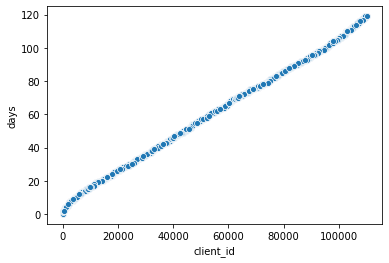

In [15]:
sns.scatterplot(x='client_id',y='days',data=df)

Идентификационый номер в 'client_id' прямо пропорционален дню подачи заявки, т.е. в банке велась последовательная нумерация заявок 

In [16]:
# объединим все полученные признаки по категориям
date_cols = ['app_date']
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport'] # default - целевая переменная
cat_cols = ['education', 'region_rating', 'home_address', 'work_address', 'sna', 'first_time', 'app_date_month']
num_cols = ['age','decline_app_cnt','score_bki','bki_request_cnt','income', 'days'] # client_id исключили из списка

### Числовые признаки

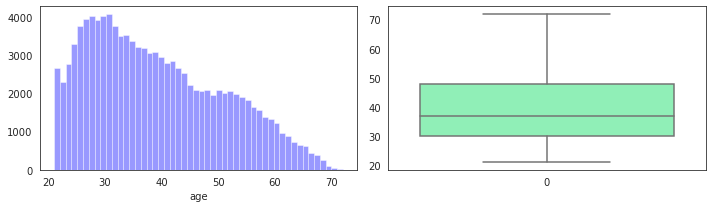

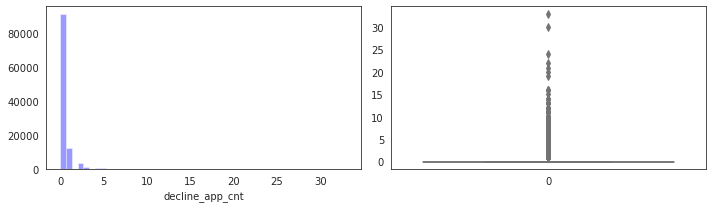

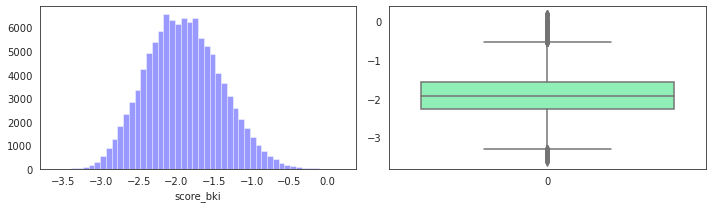

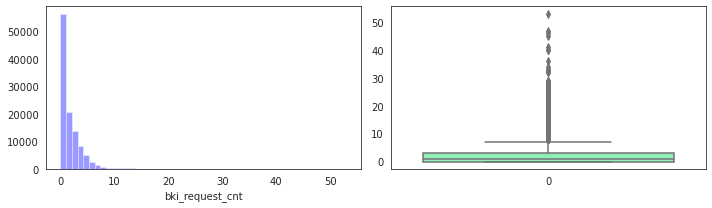

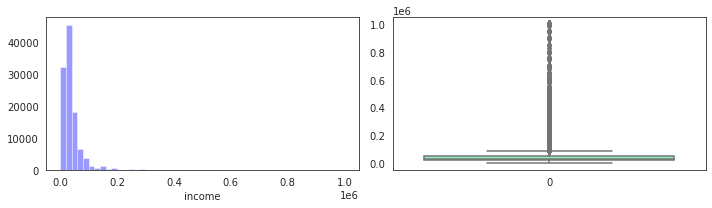

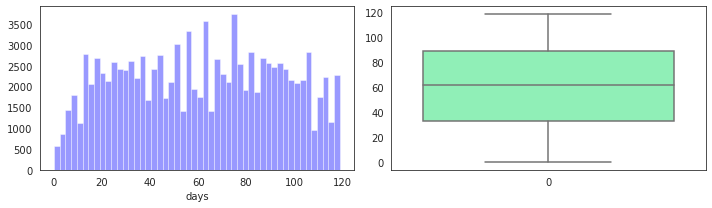

In [17]:

for i in num_cols:
    f = plt.figure(figsize=(10, 3))
    gs = f.add_gridspec(1, 2)
    with sns.axes_style("white"):
        ax = f.add_subplot(gs[0, 0])
        sns.distplot(df[i], kde = False, rug=False, color='b')

    with sns.axes_style("white"):
        ax = f.add_subplot(gs[0, 1])
        sns.boxplot(data=df[i], palette='rainbow')

    f.tight_layout()


У всех признаков, кроме 'age'и 'days' имеются выбросы.    
Все признаки, кроме 'score_bki'и 'days' распределены не нормально.

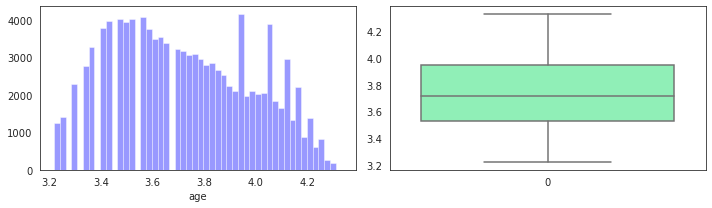

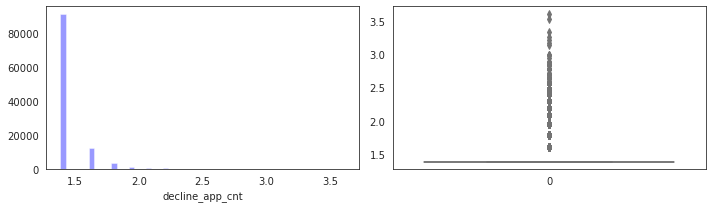

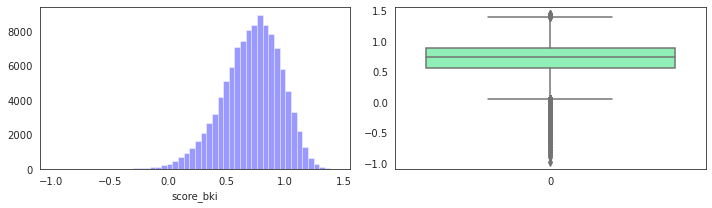

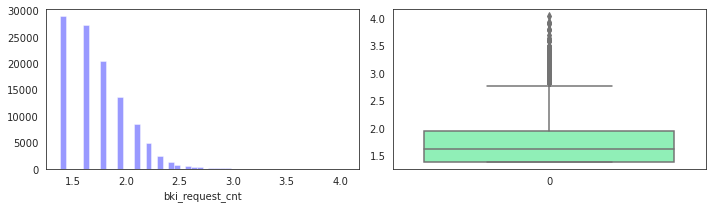

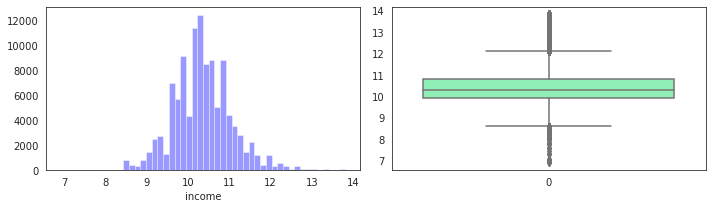

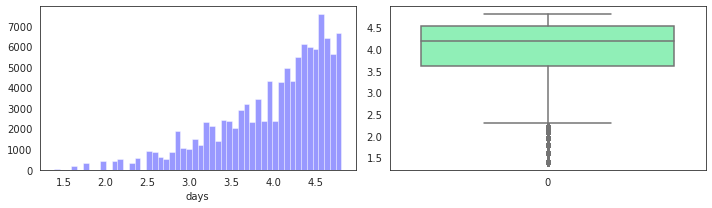

In [18]:
# пробуем логарифмировать

for i in num_cols:
    df[i] = np.log(df[i] + 4)
    f = plt.figure(figsize=(10, 3))
    gs = f.add_gridspec(1, 2)
    with sns.axes_style("white"):
        ax = f.add_subplot(gs[0, 0])
        sns.distplot(df[i], kde = False, rug=False, color='b')

    with sns.axes_style("white"):
        ax = f.add_subplot(gs[0, 1])
        sns.boxplot(data=df[i], palette='rainbow')

    f.tight_layout()


От выбросов избавиться не удалось.
Вернёмся к вопросу удаления выбросов при посроении модели.

### Категориальные признаки

In [19]:
# Для облегчения анализа избавимся от пропусков и закодируем данные
# Заполнение популярным SCH.

df['education'] = df['education'].fillna('SCH')

In [20]:
# Для анализа закодируем 'education' по категориям
df['education'] = df.apply(lambda x: 1 if x['education']=='SCH' else 2 if x['education']=='GRD' 
                           else 3 if x['education']=='UGR' else 4 if x['education']=='PGR' 
                           else 5, axis=1)

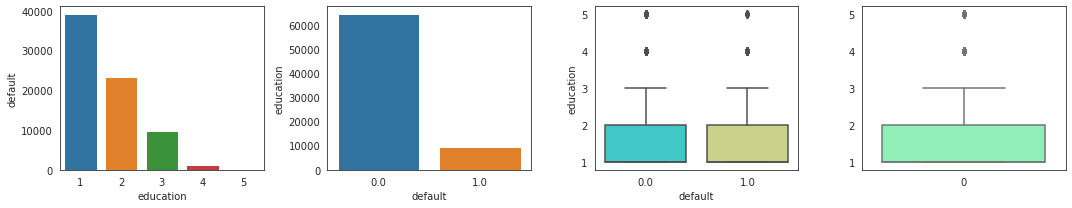

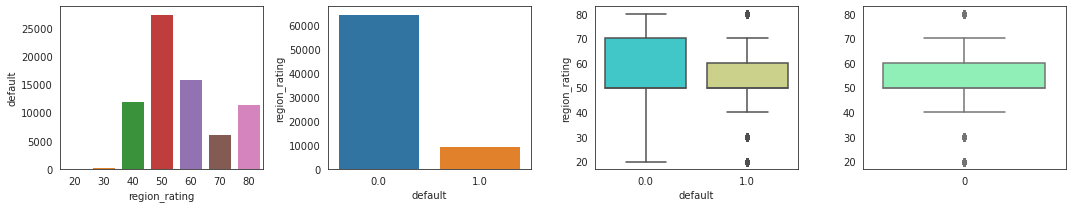

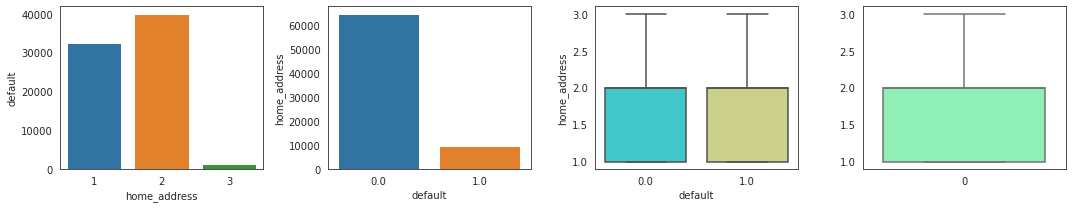

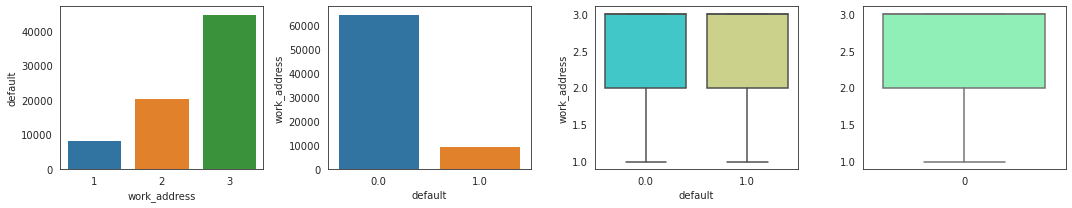

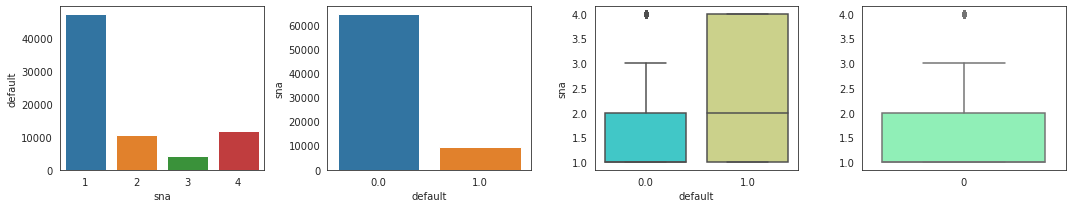

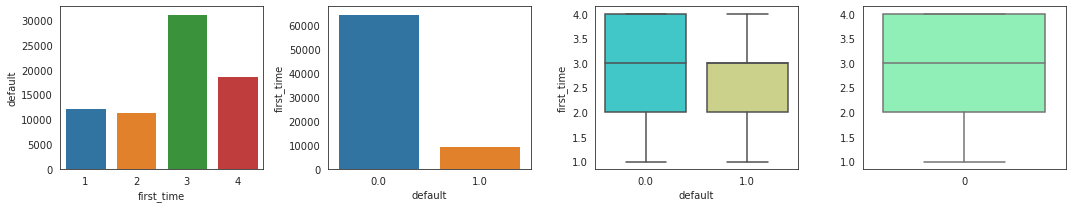

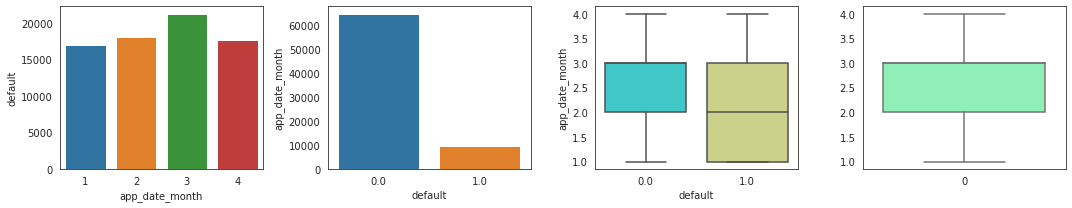

In [21]:
for i in cat_cols:
    f = plt.figure(figsize=(15, 3))
    gs = f.add_gridspec(1, 4)
    with sns.axes_style("white"):
        ax = f.add_subplot(gs[0, 0])
        sns.barplot(x=i, y='default', data=df[df['Train'] ==1], estimator=len)
        
    with sns.axes_style("white"):
        ax = f.add_subplot(gs[0, 1])
        sns.barplot(x='default', y=i, data=df[df['Train'] ==1], estimator=len)

    with sns.axes_style("white"):
        ax = f.add_subplot(gs[0, 2])
        sns.boxplot(x='default', y=i, data=df[df['Train'] ==1], palette='rainbow')
        
    with sns.axes_style("white"):
        ax = f.add_subplot(gs[0, 3])
        sns.boxplot(data=df[i], palette='rainbow')

    f.tight_layout()

Есть незначительные выбросы. 
Имеем дело с несбалансированной моделью: дефолтных представителей мало.

### Бинарные признаки

In [22]:
# Закодируем бинарные признаки
label_encoder = LabelEncoder()

for column in bin_cols:
    df[column] = label_encoder.fit_transform(df[column])

## Корреляция числовых признаков

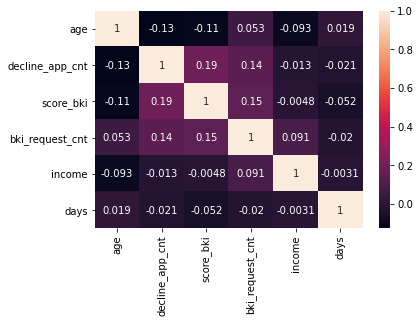

In [23]:
df_num = df[num_cols]
sns.heatmap(df_num.corr(), annot = True)

Сильно скоррелированных числовых признаков нет

# Значимость переменных

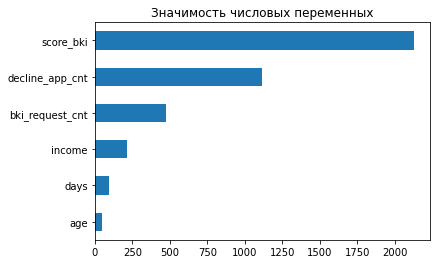

In [24]:
train_df = df[df['Train']==1]
imp_num = pd.Series(f_classif(train_df[num_cols], train_df['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh', title='Значимость числовых переменных')

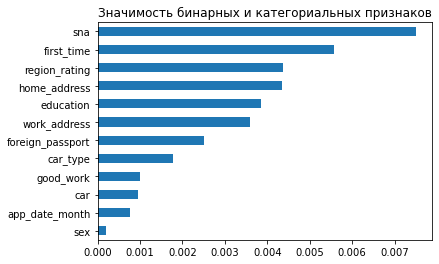

In [25]:
imp_cat = Series(mutual_info_classif(train_df[bin_cols + cat_cols], train_df['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh', title = 'Значимость бинарных и категориальных признаков')

## Подготовка к ML

In [26]:
df = pd.get_dummies(df, prefix=cat_cols, columns=cat_cols)

### Нормирование данных

In [27]:
# Поскольку в данных выбросы, воспользуемся RobustScaler
scaler = RobustScaler()

df[num_cols] = scaler.fit_transform(df[num_cols].values)

In [28]:
df.drop(['app_date', 'client_id'], axis=1, inplace=True)

# ML

In [29]:
# Возвращаем первоначальное разбиение на train и test

train_data = df[df['Train'] == 1].drop(['Train'], axis=1)
test_data = df[df['Train'] == 0].drop(['Train'], axis=1)

y = train_data.default.values           
X = train_data.drop(['default'], axis=1).values

In [30]:
# Из train выделяем данные на валидацию 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
test_data.shape, train_data.shape, X.shape, X_train.shape, X_valid.shape

((36349, 42), (73799, 42), (73799, 41), (59039, 41), (14760, 41))

In [31]:
model = LogisticRegression(random_state=RANDOM_SEED, max_iter = 1000)

model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_valid)[:,1]
y_pred = model.predict(X_valid)

## Метрики качества

In [32]:
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
value = [accuracy_score(y_valid,y_pred), precision_score(y_valid,y_pred), recall_score(y_valid,y_pred), f1_score(y_valid,y_pred)]
first_metrics_df = pd.DataFrame({'Метрика': metrics, 'Значение': value}, columns=['Метрика', 'Значение'])

### Кривая ROC-AUC

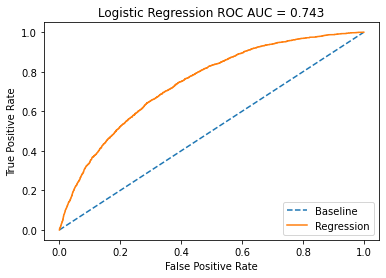

In [33]:
fpr, tpr, threshold = roc_curve(y_valid, y_pred_prob)
roc_auc = roc_auc_score(y_valid, y_pred_prob)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

### Матрица ошибок

In [34]:
tn, fp, fn, tp = confusion_matrix(y_valid, y_pred).ravel()
print(tp, fp) 
print(fn, tn)

35 57
1792 12876


Хотя ROC-AUC дал неплохой результат, мы абсолютно не угадали дефолтных клиентов. 
Посмотрим на PRC-AUC, поскольку данная метрика может оценивать эффективность алгоритма на несбалансированных данных.

In [35]:
precision, recall, thresholds = precision_recall_curve(y_valid, y_pred_prob)

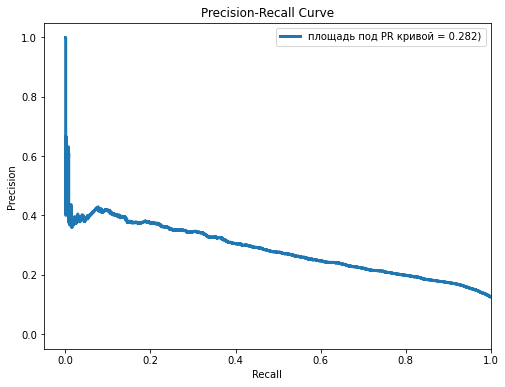

In [36]:
plt.figure(figsize=(8, 6))
prc_area = auc(recall, precision)
plt.plot(recall, precision, lw=3, label='площадь под PR кривой = %0.3f)' % prc_area)
    
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

In [37]:
# Добавим метрики в наш датасет метрик для первой модели

add_metrics = pd.DataFrame({'Метрика': ['ROC_AUC', 'PRC_AUC'], 'Значение': [roc_auc, prc_area]}, columns=['Метрика', 'Значение'])

first_metrics_df = first_metrics_df.append(add_metrics, ignore_index=True)

**Итого** 

f1_score = 0.033
recall = 0.018         
Из 1828 дефолтных клиентов модель угадала лишь 32. Имеем ошибку второго рода.            
В данном случае метрика ROC-AUC (= 0.743) не показательна, поскольку мы имеем дело с несбалансированной моделью.             

## Поиск оптимальных параметров модели

In [38]:
model = LogisticRegression(random_state=RANDOM_SEED)

iter_max = 100

param_grid = [
    {'penalty': ['l1'], 
     'solver': ['liblinear', 'lbfgs'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_max]},
    {'penalty': ['l2'], 
     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_max]},
    {'penalty': ['none'], 
     'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_max]},
]

gridsearch = GridSearchCV(model, param_grid, scoring='f1', n_jobs=-1)
gridsearch.fit(X_train, y_train)
model = gridsearch.best_estimator_
print(model)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')


In [39]:
# Обучим модель на данных и проверим confusion_matrix

model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_valid)[:,1]
y_pred = model.predict(X_valid)

In [40]:
# матрица ошибок
tn, fp, fn, tp = confusion_matrix(y_valid, y_pred).ravel()
print(tp, fp) 
print(fn, tn)

1254 4331
573 8602


In [41]:
print('Accuracy: %.4f' % accuracy_score(y_valid, y_pred))
print('Precision: %.4f' % precision_score(y_valid, y_pred))
print('Recall: %.4f' % recall_score(y_valid, y_pred))
print('F1: %.4f' % f1_score(y_valid, y_pred))

precision, recall, thresholds = precision_recall_curve(y_valid, y_pred_prob)
print('ROC_AUC = ', round(roc_auc_score(y_valid, y_pred_prob), 4))
print('PRC_AUC = ', round(auc(recall, precision), 4))

Accuracy: 0.6678
Precision: 0.2245
Recall: 0.6864
F1: 0.3384
ROC_AUC =  0.7429
PRC_AUC =  0.2809


In [42]:
# Метрики первой модели
first_metrics_df

,Метрика,Значение
0,accuracy,0.874729
1,precision,0.380435
2,recall,0.019157
3,f1_score,0.036477
4,ROC_AUC,0.743241
5,PRC_AUC,0.282095


# Submission

In [43]:
train_data = df[df['Train'] == 1].drop(['Train'], axis=1)
test_data = df[df['Train'] == 0].drop(['Train'], axis=1)

In [44]:
X_train=train_data.drop(['default'], axis=1)
y_train = train_data.default.values
X_test = test_data.drop(['default'], axis=1)

In [45]:
test_data.shape, train_data.shape, X_train.shape, y_train.shape, X_test.shape

((36349, 42), (73799, 42), (73799, 41), (73799,), (36349, 41))

In [46]:
predict_submission = model.predict_proba(X_test)[:,1]

submit = pd.DataFrame(df_test.client_id)
submit['default']=predict_submission
submit.to_csv('submission.csv', index=False)
display(submit.head(10))

,client_id,default
0,74835,0.225461
1,17527,0.795891
2,75683,0.332247
3,26883,0.397728
4,28862,0.139417
5,99881,0.587787
6,26630,0.790809
7,79934,0.146371
8,16605,0.084702
9,105449,0.144492


# Заключение


Путем поиска оптимальных параметров модели классификации удалось значительно улучшить результаты.
